In [9]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [10]:
train_data.shape

(404, 13)

In [11]:
test_data.shape

(102, 13)

In [12]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [13]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [18]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [19]:
train_data.shape[0]

404

In [20]:
train_data.shape[1]

13

In [23]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=1)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 0s 1ms/step - loss: 213.9272 - mean_absolute_error: 11.1977 - val_loss: 34.0415 - val_mean_absolute_error: 3.9110
Epoch 2/500
303/303 [==============================] - 0s 943us/step - loss: 27.6779 - mean_absolute_error: 3.7626 - val_loss: 25.8990 - val_mean_absolute_error: 3.3006
Epoch 3/500
303/303 [==============================] - 0s 2ms/step - loss: 21.8791 - mean_absolute_error: 3.2537 - val_loss: 16.7280 - val_mean_absolute_error: 2.7641
Epoch 4/500
303/303 [==============================] - 1s 2ms/step - loss: 18.1019 - mean_absolute_error: 2.9162 - val_loss: 15.6857 - val_mean_absolute_error: 2.6725
Epoch 5/500
303/303 [==============================] - 1s 2ms/step - loss: 16.2758 - mean_absolute_error: 2.7166 - val_loss: 17.7206 - val_mean_absolute_error: 2.8561
Epoch 6/500
303/303 [==============================] - 1s 2ms/step - loss: 15.3894 - mean_absol

Epoch 50/500
303/303 [==============================] - 1s 2ms/step - loss: 6.8176 - mean_absolute_error: 1.7225 - val_loss: 7.4500 - val_mean_absolute_error: 1.8348
Epoch 51/500
303/303 [==============================] - 1s 2ms/step - loss: 6.2913 - mean_absolute_error: 1.6271 - val_loss: 8.1094 - val_mean_absolute_error: 1.9899
Epoch 52/500
303/303 [==============================] - 1s 2ms/step - loss: 6.6168 - mean_absolute_error: 1.6519 - val_loss: 7.8451 - val_mean_absolute_error: 2.0304
Epoch 53/500
303/303 [==============================] - 1s 2ms/step - loss: 6.0455 - mean_absolute_error: 1.6295 - val_loss: 7.6873 - val_mean_absolute_error: 1.8519
Epoch 54/500
303/303 [==============================] - 1s 2ms/step - loss: 6.1140 - mean_absolute_error: 1.6306 - val_loss: 7.6297 - val_mean_absolute_error: 2.0005
Epoch 55/500
303/303 [==============================] - 1s 2ms/step - loss: 6.5865 - mean_absolute_error: 1.6758 - val_loss: 6.7844 - val_mean_absolute_error: 1.8909
Epoc

303/303 [==============================] - 1s 2ms/step - loss: 4.0503 - mean_absolute_error: 1.3106 - val_loss: 9.1500 - val_mean_absolute_error: 2.2401
Epoch 100/500
303/303 [==============================] - 1s 2ms/step - loss: 4.4739 - mean_absolute_error: 1.4214 - val_loss: 7.3685 - val_mean_absolute_error: 1.9203
Epoch 101/500
303/303 [==============================] - 1s 2ms/step - loss: 4.2754 - mean_absolute_error: 1.3943 - val_loss: 7.1132 - val_mean_absolute_error: 2.0533
Epoch 102/500
303/303 [==============================] - 1s 2ms/step - loss: 4.4294 - mean_absolute_error: 1.3797 - val_loss: 7.6471 - val_mean_absolute_error: 2.0134
Epoch 103/500
303/303 [==============================] - 1s 2ms/step - loss: 4.1199 - mean_absolute_error: 1.3789 - val_loss: 7.8742 - val_mean_absolute_error: 2.0162
Epoch 104/500
303/303 [==============================] - 1s 2ms/step - loss: 4.3788 - mean_absolute_error: 1.3909 - val_loss: 8.0184 - val_mean_absolute_error: 2.1197
Epoch 105/50

303/303 [==============================] - 1s 2ms/step - loss: 3.1201 - mean_absolute_error: 1.2747 - val_loss: 9.5814 - val_mean_absolute_error: 2.2305
Epoch 149/500
303/303 [==============================] - 1s 2ms/step - loss: 3.2394 - mean_absolute_error: 1.2085 - val_loss: 8.5050 - val_mean_absolute_error: 2.0981
Epoch 150/500
303/303 [==============================] - 1s 2ms/step - loss: 3.5685 - mean_absolute_error: 1.3206 - val_loss: 9.3780 - val_mean_absolute_error: 2.0964
Epoch 151/500
303/303 [==============================] - 1s 2ms/step - loss: 3.1849 - mean_absolute_error: 1.2317 - val_loss: 9.6158 - val_mean_absolute_error: 2.2428
Epoch 152/500
303/303 [==============================] - 1s 2ms/step - loss: 3.1112 - mean_absolute_error: 1.2757 - val_loss: 7.6530 - val_mean_absolute_error: 2.0668
Epoch 153/500
303/303 [==============================] - 1s 2ms/step - loss: 3.1090 - mean_absolute_error: 1.1653 - val_loss: 8.8756 - val_mean_absolute_error: 2.2561
Epoch 154/50

303/303 [==============================] - 1s 2ms/step - loss: 2.4904 - mean_absolute_error: 1.1313 - val_loss: 9.5170 - val_mean_absolute_error: 2.0607
Epoch 198/500
303/303 [==============================] - 1s 2ms/step - loss: 2.5522 - mean_absolute_error: 1.1512 - val_loss: 8.4465 - val_mean_absolute_error: 1.8871
Epoch 199/500
303/303 [==============================] - 1s 2ms/step - loss: 2.4757 - mean_absolute_error: 1.1196 - val_loss: 10.1051 - val_mean_absolute_error: 2.0854
Epoch 200/500
303/303 [==============================] - 1s 2ms/step - loss: 2.1318 - mean_absolute_error: 1.0548 - val_loss: 9.3934 - val_mean_absolute_error: 2.1047
Epoch 201/500
303/303 [==============================] - 1s 2ms/step - loss: 2.2397 - mean_absolute_error: 1.0363 - val_loss: 8.6703 - val_mean_absolute_error: 2.0033
Epoch 202/500
303/303 [==============================] - 1s 2ms/step - loss: 2.3722 - mean_absolute_error: 1.0873 - val_loss: 9.8507 - val_mean_absolute_error: 2.2398
Epoch 203/5

303/303 [==============================] - 1s 2ms/step - loss: 2.0396 - mean_absolute_error: 0.9981 - val_loss: 9.7538 - val_mean_absolute_error: 2.1681
Epoch 247/500
303/303 [==============================] - 1s 2ms/step - loss: 2.0308 - mean_absolute_error: 1.0148 - val_loss: 9.8339 - val_mean_absolute_error: 2.0794
Epoch 248/500
303/303 [==============================] - 1s 2ms/step - loss: 1.7464 - mean_absolute_error: 0.9859 - val_loss: 9.3658 - val_mean_absolute_error: 2.0075
Epoch 249/500
303/303 [==============================] - 1s 2ms/step - loss: 2.0363 - mean_absolute_error: 1.0317 - val_loss: 10.8387 - val_mean_absolute_error: 2.4168
Epoch 250/500
303/303 [==============================] - 0s 2ms/step - loss: 1.8431 - mean_absolute_error: 0.9540 - val_loss: 11.5264 - val_mean_absolute_error: 2.3797
Epoch 251/500
303/303 [==============================] - 1s 2ms/step - loss: 1.6031 - mean_absolute_error: 0.9658 - val_loss: 9.2356 - val_mean_absolute_error: 2.0413
Epoch 252/

Epoch 295/500
303/303 [==============================] - 1s 2ms/step - loss: 2.0019 - mean_absolute_error: 0.9730 - val_loss: 10.2454 - val_mean_absolute_error: 2.1657
Epoch 296/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5570 - mean_absolute_error: 0.9272 - val_loss: 11.2754 - val_mean_absolute_error: 2.2322
Epoch 297/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4253 - mean_absolute_error: 0.8779 - val_loss: 10.6406 - val_mean_absolute_error: 2.1579
Epoch 298/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4967 - mean_absolute_error: 0.8990 - val_loss: 10.8449 - val_mean_absolute_error: 2.1672
Epoch 299/500
303/303 [==============================] - 0s 2ms/step - loss: 1.5909 - mean_absolute_error: 0.9455 - val_loss: 11.4799 - val_mean_absolute_error: 2.2374
Epoch 300/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4937 - mean_absolute_error: 0.8679 - val_loss: 10.8403 - val_mean_absolute_error:

Epoch 344/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3355 - mean_absolute_error: 0.8515 - val_loss: 14.1665 - val_mean_absolute_error: 2.5553
Epoch 345/500
303/303 [==============================] - 0s 2ms/step - loss: 1.3565 - mean_absolute_error: 0.8359 - val_loss: 11.6538 - val_mean_absolute_error: 2.2878
Epoch 346/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4382 - mean_absolute_error: 0.8466 - val_loss: 12.7884 - val_mean_absolute_error: 2.4029
Epoch 347/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3079 - mean_absolute_error: 0.8460 - val_loss: 11.8287 - val_mean_absolute_error: 2.2703
Epoch 348/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3225 - mean_absolute_error: 0.8518 - val_loss: 11.2860 - val_mean_absolute_error: 2.2936
Epoch 349/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0989 - mean_absolute_error: 0.7782 - val_loss: 11.6412 - val_mean_absolute_error:

Epoch 393/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2846 - mean_absolute_error: 0.7952 - val_loss: 14.3562 - val_mean_absolute_error: 2.5431
Epoch 394/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2423 - mean_absolute_error: 0.7952 - val_loss: 12.2685 - val_mean_absolute_error: 2.3861
Epoch 395/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2565 - mean_absolute_error: 0.8342 - val_loss: 12.2420 - val_mean_absolute_error: 2.3271
Epoch 396/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2251 - mean_absolute_error: 0.7850 - val_loss: 12.2805 - val_mean_absolute_error: 2.3557
Epoch 397/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2222 - mean_absolute_error: 0.7781 - val_loss: 14.4016 - val_mean_absolute_error: 2.5782
Epoch 398/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3018 - mean_absolute_error: 0.8139 - val_loss: 12.2053 - val_mean_absolute_error:

Epoch 442/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1944 - mean_absolute_error: 0.7543 - val_loss: 13.8587 - val_mean_absolute_error: 2.4700
Epoch 443/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0313 - mean_absolute_error: 0.7565 - val_loss: 12.7152 - val_mean_absolute_error: 2.4125
Epoch 444/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0753 - mean_absolute_error: 0.7854 - val_loss: 13.0545 - val_mean_absolute_error: 2.4754
Epoch 445/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1850 - mean_absolute_error: 0.8031 - val_loss: 13.2295 - val_mean_absolute_error: 2.3889
Epoch 446/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0138 - mean_absolute_error: 0.7519 - val_loss: 13.4864 - val_mean_absolute_error: 2.4969
Epoch 447/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0454 - mean_absolute_error: 0.7396 - val_loss: 14.1466 - val_mean_absolute_error:

Epoch 491/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0848 - mean_absolute_error: 0.7273 - val_loss: 14.5150 - val_mean_absolute_error: 2.6316
Epoch 492/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8222 - mean_absolute_error: 0.6743 - val_loss: 13.8210 - val_mean_absolute_error: 2.5341
Epoch 493/500
303/303 [==============================] - 0s 2ms/step - loss: 0.8801 - mean_absolute_error: 0.7095 - val_loss: 12.4854 - val_mean_absolute_error: 2.3689
Epoch 494/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9951 - mean_absolute_error: 0.7053 - val_loss: 12.7243 - val_mean_absolute_error: 2.3387
Epoch 495/500
303/303 [==============================] - 0s 2ms/step - loss: 0.8424 - mean_absolute_error: 0.6827 - val_loss: 13.2766 - val_mean_absolute_error: 2.3437
Epoch 496/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0111 - mean_absolute_error: 0.7235 - val_loss: 13.0448 - val_mean_absolute_error:

303/303 [==============================] - 1s 2ms/step - loss: 7.2784 - mean_absolute_error: 1.7588 - val_loss: 11.4128 - val_mean_absolute_error: 2.5715
Epoch 40/500
303/303 [==============================] - 1s 2ms/step - loss: 7.3003 - mean_absolute_error: 1.7884 - val_loss: 9.6892 - val_mean_absolute_error: 2.4085
Epoch 41/500
303/303 [==============================] - 1s 2ms/step - loss: 6.9960 - mean_absolute_error: 1.7755 - val_loss: 10.3739 - val_mean_absolute_error: 2.4626
Epoch 42/500
303/303 [==============================] - 1s 2ms/step - loss: 6.9385 - mean_absolute_error: 1.7459 - val_loss: 10.9501 - val_mean_absolute_error: 2.5081
Epoch 43/500
303/303 [==============================] - 0s 2ms/step - loss: 6.9233 - mean_absolute_error: 1.6781 - val_loss: 11.0719 - val_mean_absolute_error: 2.4676
Epoch 44/500
303/303 [==============================] - 1s 2ms/step - loss: 6.6971 - mean_absolute_error: 1.6541 - val_loss: 12.8776 - val_mean_absolute_error: 2.7586
Epoch 45/500

303/303 [==============================] - 1s 2ms/step - loss: 4.0863 - mean_absolute_error: 1.3376 - val_loss: 13.9823 - val_mean_absolute_error: 2.4519
Epoch 89/500
303/303 [==============================] - 1s 2ms/step - loss: 3.9285 - mean_absolute_error: 1.3705 - val_loss: 14.8026 - val_mean_absolute_error: 2.6279
Epoch 90/500
303/303 [==============================] - 1s 2ms/step - loss: 3.8576 - mean_absolute_error: 1.2757 - val_loss: 20.3662 - val_mean_absolute_error: 3.2040
Epoch 91/500
303/303 [==============================] - 1s 2ms/step - loss: 3.8919 - mean_absolute_error: 1.2756 - val_loss: 16.6903 - val_mean_absolute_error: 2.5785
Epoch 92/500
303/303 [==============================] - 1s 2ms/step - loss: 3.4863 - mean_absolute_error: 1.2293 - val_loss: 18.4207 - val_mean_absolute_error: 2.6284
Epoch 93/500
303/303 [==============================] - 1s 2ms/step - loss: 4.1375 - mean_absolute_error: 1.2644 - val_loss: 15.4941 - val_mean_absolute_error: 2.5639
Epoch 94/50

Epoch 137/500
303/303 [==============================] - 1s 2ms/step - loss: 2.5087 - mean_absolute_error: 1.0502 - val_loss: 16.4049 - val_mean_absolute_error: 2.5904
Epoch 138/500
303/303 [==============================] - 1s 2ms/step - loss: 2.5714 - mean_absolute_error: 1.1296 - val_loss: 16.4354 - val_mean_absolute_error: 2.6034
Epoch 139/500
303/303 [==============================] - 1s 2ms/step - loss: 2.5133 - mean_absolute_error: 1.0925 - val_loss: 19.7490 - val_mean_absolute_error: 2.7877
Epoch 140/500
303/303 [==============================] - 1s 2ms/step - loss: 2.4260 - mean_absolute_error: 1.0397 - val_loss: 16.8479 - val_mean_absolute_error: 2.5882
Epoch 141/500
303/303 [==============================] - 1s 2ms/step - loss: 2.4317 - mean_absolute_error: 1.0658 - val_loss: 19.2106 - val_mean_absolute_error: 2.7818
Epoch 142/500
303/303 [==============================] - 1s 2ms/step - loss: 2.2664 - mean_absolute_error: 1.0625 - val_loss: 21.2429 - val_mean_absolute_error:

Epoch 186/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5884 - mean_absolute_error: 0.9221 - val_loss: 18.7198 - val_mean_absolute_error: 2.7824
Epoch 187/500
303/303 [==============================] - 1s 2ms/step - loss: 1.6402 - mean_absolute_error: 0.9439 - val_loss: 20.7919 - val_mean_absolute_error: 2.9583
Epoch 188/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5288 - mean_absolute_error: 0.9209 - val_loss: 16.4889 - val_mean_absolute_error: 2.6629
Epoch 189/500
303/303 [==============================] - 1s 2ms/step - loss: 1.7951 - mean_absolute_error: 0.9030 - val_loss: 23.7565 - val_mean_absolute_error: 2.9855
Epoch 190/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5733 - mean_absolute_error: 0.9360 - val_loss: 21.6781 - val_mean_absolute_error: 3.1052
Epoch 191/500
303/303 [==============================] - 1s 2ms/step - loss: 1.7854 - mean_absolute_error: 0.9830 - val_loss: 22.5597 - val_mean_absolute_error:

Epoch 235/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3005 - mean_absolute_error: 0.8522 - val_loss: 25.2242 - val_mean_absolute_error: 3.0300
Epoch 236/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3831 - mean_absolute_error: 0.8598 - val_loss: 22.7223 - val_mean_absolute_error: 2.8641
Epoch 237/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1842 - mean_absolute_error: 0.8422 - val_loss: 19.0228 - val_mean_absolute_error: 2.9007
Epoch 238/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2826 - mean_absolute_error: 0.8651 - val_loss: 26.5527 - val_mean_absolute_error: 3.2621
Epoch 239/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3312 - mean_absolute_error: 0.8368 - val_loss: 16.7061 - val_mean_absolute_error: 2.6636
Epoch 240/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3432 - mean_absolute_error: 0.8466 - val_loss: 22.2666 - val_mean_absolute_error:

Epoch 284/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1421 - mean_absolute_error: 0.7792 - val_loss: 19.9130 - val_mean_absolute_error: 2.9596
Epoch 285/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9689 - mean_absolute_error: 0.7429 - val_loss: 23.6284 - val_mean_absolute_error: 3.1465
Epoch 286/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0489 - mean_absolute_error: 0.7516 - val_loss: 22.6857 - val_mean_absolute_error: 3.0396
Epoch 287/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0668 - mean_absolute_error: 0.7789 - val_loss: 22.0927 - val_mean_absolute_error: 3.0878
Epoch 288/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0137 - mean_absolute_error: 0.7600 - val_loss: 23.6496 - val_mean_absolute_error: 2.9595
Epoch 289/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1092 - mean_absolute_error: 0.8083 - val_loss: 27.3773 - val_mean_absolute_error:

Epoch 333/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0546 - mean_absolute_error: 0.7200 - val_loss: 23.9941 - val_mean_absolute_error: 2.8711
Epoch 334/500
303/303 [==============================] - 0s 2ms/step - loss: 0.9813 - mean_absolute_error: 0.7139 - val_loss: 27.5368 - val_mean_absolute_error: 3.1676
Epoch 335/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9291 - mean_absolute_error: 0.6755 - val_loss: 24.0166 - val_mean_absolute_error: 3.1799
Epoch 336/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9203 - mean_absolute_error: 0.6945 - val_loss: 26.6734 - val_mean_absolute_error: 3.1314
Epoch 337/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9163 - mean_absolute_error: 0.7095 - val_loss: 23.6258 - val_mean_absolute_error: 3.0713
Epoch 338/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9190 - mean_absolute_error: 0.7238 - val_loss: 29.3357 - val_mean_absolute_error:

Epoch 382/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8238 - mean_absolute_error: 0.7052 - val_loss: 28.3686 - val_mean_absolute_error: 3.3026
Epoch 383/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8993 - mean_absolute_error: 0.6889 - val_loss: 32.2904 - val_mean_absolute_error: 3.2915
Epoch 384/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8408 - mean_absolute_error: 0.6901 - val_loss: 33.4374 - val_mean_absolute_error: 3.3946
Epoch 385/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8772 - mean_absolute_error: 0.6885 - val_loss: 18.5838 - val_mean_absolute_error: 2.8952
Epoch 386/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8979 - mean_absolute_error: 0.6777 - val_loss: 30.3622 - val_mean_absolute_error: 3.2992
Epoch 387/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8826 - mean_absolute_error: 0.6866 - val_loss: 29.4182 - val_mean_absolute_error:

Epoch 431/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8190 - mean_absolute_error: 0.6266 - val_loss: 23.7455 - val_mean_absolute_error: 3.0379
Epoch 432/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7706 - mean_absolute_error: 0.6254 - val_loss: 25.6096 - val_mean_absolute_error: 3.1590
Epoch 433/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8224 - mean_absolute_error: 0.6764 - val_loss: 26.5394 - val_mean_absolute_error: 3.2477
Epoch 434/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7859 - mean_absolute_error: 0.6403 - val_loss: 23.9787 - val_mean_absolute_error: 3.1560
Epoch 435/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7735 - mean_absolute_error: 0.6677 - val_loss: 24.9318 - val_mean_absolute_error: 3.1127
Epoch 436/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7850 - mean_absolute_error: 0.6491 - val_loss: 28.6767 - val_mean_absolute_error:

Epoch 480/500
303/303 [==============================] - 1s 2ms/step - loss: 0.6765 - mean_absolute_error: 0.6006 - val_loss: 19.7441 - val_mean_absolute_error: 3.0264
Epoch 481/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7160 - mean_absolute_error: 0.6044 - val_loss: 22.7244 - val_mean_absolute_error: 3.0608
Epoch 482/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7364 - mean_absolute_error: 0.6337 - val_loss: 23.6133 - val_mean_absolute_error: 3.1547
Epoch 483/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7138 - mean_absolute_error: 0.5922 - val_loss: 19.4023 - val_mean_absolute_error: 2.9731
Epoch 484/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7209 - mean_absolute_error: 0.6443 - val_loss: 19.0518 - val_mean_absolute_error: 2.9567
Epoch 485/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7558 - mean_absolute_error: 0.6217 - val_loss: 19.3149 - val_mean_absolute_error:

303/303 [==============================] - 1s 2ms/step - loss: 6.7931 - mean_absolute_error: 1.8322 - val_loss: 14.7920 - val_mean_absolute_error: 2.5299
Epoch 29/500
303/303 [==============================] - 1s 2ms/step - loss: 6.4258 - mean_absolute_error: 1.7960 - val_loss: 15.9987 - val_mean_absolute_error: 2.6257
Epoch 30/500
303/303 [==============================] - 1s 2ms/step - loss: 6.5244 - mean_absolute_error: 1.7923 - val_loss: 14.1579 - val_mean_absolute_error: 2.4698
Epoch 31/500
303/303 [==============================] - 1s 2ms/step - loss: 6.7574 - mean_absolute_error: 1.8022 - val_loss: 14.4563 - val_mean_absolute_error: 2.7018
Epoch 32/500
303/303 [==============================] - 1s 2ms/step - loss: 6.5035 - mean_absolute_error: 1.7681 - val_loss: 14.7069 - val_mean_absolute_error: 2.5512
Epoch 33/500
303/303 [==============================] - 1s 2ms/step - loss: 6.5784 - mean_absolute_error: 1.7248 - val_loss: 13.8673 - val_mean_absolute_error: 2.5369
Epoch 34/50

303/303 [==============================] - 1s 2ms/step - loss: 3.7546 - mean_absolute_error: 1.2906 - val_loss: 16.7430 - val_mean_absolute_error: 2.8558
Epoch 78/500
303/303 [==============================] - 1s 2ms/step - loss: 3.6389 - mean_absolute_error: 1.3477 - val_loss: 15.0065 - val_mean_absolute_error: 2.6565
Epoch 79/500
303/303 [==============================] - 1s 2ms/step - loss: 3.5397 - mean_absolute_error: 1.3434 - val_loss: 15.7442 - val_mean_absolute_error: 2.6978
Epoch 80/500
303/303 [==============================] - 1s 2ms/step - loss: 3.5063 - mean_absolute_error: 1.3149 - val_loss: 14.6513 - val_mean_absolute_error: 2.6567
Epoch 81/500
303/303 [==============================] - 1s 2ms/step - loss: 3.5403 - mean_absolute_error: 1.3553 - val_loss: 14.3607 - val_mean_absolute_error: 2.5372
Epoch 82/500
303/303 [==============================] - 1s 2ms/step - loss: 3.6361 - mean_absolute_error: 1.3410 - val_loss: 14.1801 - val_mean_absolute_error: 2.5180
Epoch 83/50

Epoch 126/500
303/303 [==============================] - 1s 2ms/step - loss: 2.5039 - mean_absolute_error: 1.1421 - val_loss: 15.0496 - val_mean_absolute_error: 2.6380
Epoch 127/500
303/303 [==============================] - 1s 2ms/step - loss: 2.5816 - mean_absolute_error: 1.1194 - val_loss: 15.6979 - val_mean_absolute_error: 2.6549
Epoch 128/500
303/303 [==============================] - 1s 2ms/step - loss: 2.5395 - mean_absolute_error: 1.1304 - val_loss: 13.9283 - val_mean_absolute_error: 2.4853
Epoch 129/500
303/303 [==============================] - 1s 2ms/step - loss: 2.3480 - mean_absolute_error: 1.0516 - val_loss: 16.0285 - val_mean_absolute_error: 2.8279
Epoch 130/500
303/303 [==============================] - 1s 2ms/step - loss: 2.3869 - mean_absolute_error: 1.0726 - val_loss: 15.0837 - val_mean_absolute_error: 2.6027
Epoch 131/500
303/303 [==============================] - 1s 2ms/step - loss: 2.4208 - mean_absolute_error: 1.0725 - val_loss: 14.5447 - val_mean_absolute_error:

Epoch 175/500
303/303 [==============================] - 1s 2ms/step - loss: 1.7429 - mean_absolute_error: 0.9829 - val_loss: 14.5738 - val_mean_absolute_error: 2.6165
Epoch 176/500
303/303 [==============================] - 1s 2ms/step - loss: 1.8406 - mean_absolute_error: 0.9998 - val_loss: 16.7924 - val_mean_absolute_error: 2.9037
Epoch 177/500
303/303 [==============================] - 1s 2ms/step - loss: 1.6857 - mean_absolute_error: 0.9627 - val_loss: 15.2524 - val_mean_absolute_error: 2.8659
Epoch 178/500
303/303 [==============================] - 1s 2ms/step - loss: 1.6642 - mean_absolute_error: 0.9426 - val_loss: 14.6048 - val_mean_absolute_error: 2.6150
Epoch 179/500
303/303 [==============================] - 1s 2ms/step - loss: 1.7171 - mean_absolute_error: 0.9990 - val_loss: 16.4870 - val_mean_absolute_error: 2.8170
Epoch 180/500
303/303 [==============================] - 1s 2ms/step - loss: 1.9703 - mean_absolute_error: 1.0113 - val_loss: 15.0963 - val_mean_absolute_error:

Epoch 224/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5155 - mean_absolute_error: 0.8792 - val_loss: 14.8564 - val_mean_absolute_error: 2.6586
Epoch 225/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5549 - mean_absolute_error: 0.8948 - val_loss: 14.9969 - val_mean_absolute_error: 2.6861
Epoch 226/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4752 - mean_absolute_error: 0.8649 - val_loss: 15.1833 - val_mean_absolute_error: 2.6759
Epoch 227/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4182 - mean_absolute_error: 0.8489 - val_loss: 15.3166 - val_mean_absolute_error: 2.6970
Epoch 228/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4520 - mean_absolute_error: 0.8871 - val_loss: 14.8730 - val_mean_absolute_error: 2.6470
Epoch 229/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4087 - mean_absolute_error: 0.8770 - val_loss: 16.4625 - val_mean_absolute_error:

303/303 [==============================] - 1s 2ms/step - loss: 1.1737 - mean_absolute_error: 0.8212 - val_loss: 14.4461 - val_mean_absolute_error: 2.6670
Epoch 273/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2285 - mean_absolute_error: 0.7874 - val_loss: 14.3961 - val_mean_absolute_error: 2.6257
Epoch 274/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2072 - mean_absolute_error: 0.7650 - val_loss: 15.0029 - val_mean_absolute_error: 2.7042
Epoch 275/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2562 - mean_absolute_error: 0.8064 - val_loss: 14.3426 - val_mean_absolute_error: 2.6685
Epoch 276/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1508 - mean_absolute_error: 0.7722 - val_loss: 14.5102 - val_mean_absolute_error: 2.7244
Epoch 277/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1535 - mean_absolute_error: 0.8051 - val_loss: 14.1263 - val_mean_absolute_error: 2.6935
Epoch 

Epoch 321/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0707 - mean_absolute_error: 0.7624 - val_loss: 14.2038 - val_mean_absolute_error: 2.6313
Epoch 322/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0100 - mean_absolute_error: 0.7367 - val_loss: 13.2121 - val_mean_absolute_error: 2.5675
Epoch 323/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1500 - mean_absolute_error: 0.7810 - val_loss: 13.5042 - val_mean_absolute_error: 2.5912
Epoch 324/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9742 - mean_absolute_error: 0.7507 - val_loss: 13.5102 - val_mean_absolute_error: 2.6315
Epoch 325/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0914 - mean_absolute_error: 0.7780 - val_loss: 14.3522 - val_mean_absolute_error: 2.6801
Epoch 326/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1028 - mean_absolute_error: 0.7445 - val_loss: 14.9753 - val_mean_absolute_error:

Epoch 370/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8712 - mean_absolute_error: 0.6889 - val_loss: 13.0789 - val_mean_absolute_error: 2.5657
Epoch 371/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0480 - mean_absolute_error: 0.7456 - val_loss: 12.4768 - val_mean_absolute_error: 2.5228
Epoch 372/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9482 - mean_absolute_error: 0.7191 - val_loss: 13.2811 - val_mean_absolute_error: 2.5716
Epoch 373/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9196 - mean_absolute_error: 0.6887 - val_loss: 13.9080 - val_mean_absolute_error: 2.5554
Epoch 374/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9581 - mean_absolute_error: 0.7191 - val_loss: 13.0889 - val_mean_absolute_error: 2.5689
Epoch 375/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8370 - mean_absolute_error: 0.6508 - val_loss: 13.6691 - val_mean_absolute_error:

Epoch 419/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7958 - mean_absolute_error: 0.6275 - val_loss: 13.7240 - val_mean_absolute_error: 2.6511
Epoch 420/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7655 - mean_absolute_error: 0.6555 - val_loss: 12.6993 - val_mean_absolute_error: 2.5115
Epoch 421/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8859 - mean_absolute_error: 0.6832 - val_loss: 13.4170 - val_mean_absolute_error: 2.5993
Epoch 422/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8531 - mean_absolute_error: 0.6557 - val_loss: 13.4839 - val_mean_absolute_error: 2.6197
Epoch 423/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8763 - mean_absolute_error: 0.6722 - val_loss: 13.9407 - val_mean_absolute_error: 2.6499
Epoch 424/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8581 - mean_absolute_error: 0.6505 - val_loss: 13.2796 - val_mean_absolute_error:

Epoch 468/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7428 - mean_absolute_error: 0.6360 - val_loss: 12.8082 - val_mean_absolute_error: 2.5195
Epoch 469/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7824 - mean_absolute_error: 0.6262 - val_loss: 12.2551 - val_mean_absolute_error: 2.5174
Epoch 470/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7879 - mean_absolute_error: 0.6211 - val_loss: 12.1187 - val_mean_absolute_error: 2.5050
Epoch 471/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7524 - mean_absolute_error: 0.6271 - val_loss: 12.5424 - val_mean_absolute_error: 2.5163
Epoch 472/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7347 - mean_absolute_error: 0.6237 - val_loss: 11.6864 - val_mean_absolute_error: 2.4530
Epoch 473/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7279 - mean_absolute_error: 0.6294 - val_loss: 13.3013 - val_mean_absolute_error:

303/303 [==============================] - 1s 2ms/step - loss: 9.6039 - mean_absolute_error: 2.0344 - val_loss: 16.7901 - val_mean_absolute_error: 2.5791
Epoch 17/500
303/303 [==============================] - 1s 2ms/step - loss: 9.5180 - mean_absolute_error: 2.0056 - val_loss: 15.8337 - val_mean_absolute_error: 2.5274
Epoch 18/500
303/303 [==============================] - 1s 2ms/step - loss: 9.0889 - mean_absolute_error: 1.9487 - val_loss: 15.4665 - val_mean_absolute_error: 2.5518
Epoch 19/500
303/303 [==============================] - 1s 2ms/step - loss: 8.8097 - mean_absolute_error: 1.9326 - val_loss: 15.2129 - val_mean_absolute_error: 2.6619
Epoch 20/500
303/303 [==============================] - 1s 2ms/step - loss: 8.6632 - mean_absolute_error: 1.9299 - val_loss: 13.7634 - val_mean_absolute_error: 2.4311
Epoch 21/500
303/303 [==============================] - 1s 2ms/step - loss: 8.7258 - mean_absolute_error: 1.9425 - val_loss: 13.9833 - val_mean_absolute_error: 2.5906
Epoch 22/50

303/303 [==============================] - 1s 2ms/step - loss: 5.1253 - mean_absolute_error: 1.4762 - val_loss: 10.7977 - val_mean_absolute_error: 2.3396
Epoch 66/500
303/303 [==============================] - 1s 2ms/step - loss: 5.2308 - mean_absolute_error: 1.5120 - val_loss: 10.4657 - val_mean_absolute_error: 2.3263
Epoch 67/500
303/303 [==============================] - 1s 2ms/step - loss: 5.1669 - mean_absolute_error: 1.5202 - val_loss: 11.1622 - val_mean_absolute_error: 2.3681
Epoch 68/500
303/303 [==============================] - 1s 2ms/step - loss: 4.8164 - mean_absolute_error: 1.4796 - val_loss: 10.3674 - val_mean_absolute_error: 2.2377
Epoch 69/500
303/303 [==============================] - 1s 2ms/step - loss: 4.9746 - mean_absolute_error: 1.5541 - val_loss: 10.4398 - val_mean_absolute_error: 2.2778
Epoch 70/500
303/303 [==============================] - 1s 2ms/step - loss: 4.7474 - mean_absolute_error: 1.4590 - val_loss: 10.4305 - val_mean_absolute_error: 2.2571
Epoch 71/50

303/303 [==============================] - 1s 2ms/step - loss: 3.8223 - mean_absolute_error: 1.2491 - val_loss: 11.4227 - val_mean_absolute_error: 2.4191
Epoch 115/500
303/303 [==============================] - 1s 2ms/step - loss: 3.5890 - mean_absolute_error: 1.2745 - val_loss: 10.8012 - val_mean_absolute_error: 2.2845
Epoch 116/500
303/303 [==============================] - 1s 2ms/step - loss: 3.3202 - mean_absolute_error: 1.2153 - val_loss: 11.6006 - val_mean_absolute_error: 2.3908
Epoch 117/500
303/303 [==============================] - 1s 2ms/step - loss: 3.6193 - mean_absolute_error: 1.2790 - val_loss: 11.6910 - val_mean_absolute_error: 2.3922
Epoch 118/500
303/303 [==============================] - 1s 2ms/step - loss: 3.4967 - mean_absolute_error: 1.2952 - val_loss: 10.1382 - val_mean_absolute_error: 2.1448
Epoch 119/500
303/303 [==============================] - 1s 2ms/step - loss: 3.2413 - mean_absolute_error: 1.2015 - val_loss: 11.3981 - val_mean_absolute_error: 2.3204
Epoch 

Epoch 163/500
303/303 [==============================] - 1s 2ms/step - loss: 2.9756 - mean_absolute_error: 1.1286 - val_loss: 13.7249 - val_mean_absolute_error: 2.6476
Epoch 164/500
303/303 [==============================] - 1s 2ms/step - loss: 2.5776 - mean_absolute_error: 1.0843 - val_loss: 11.4431 - val_mean_absolute_error: 2.3248
Epoch 165/500
303/303 [==============================] - 1s 2ms/step - loss: 2.7577 - mean_absolute_error: 1.0935 - val_loss: 11.6050 - val_mean_absolute_error: 2.4187
Epoch 166/500
303/303 [==============================] - 1s 2ms/step - loss: 2.8537 - mean_absolute_error: 1.1470 - val_loss: 11.9738 - val_mean_absolute_error: 2.4361
Epoch 167/500
303/303 [==============================] - 1s 2ms/step - loss: 2.7140 - mean_absolute_error: 1.1140 - val_loss: 12.0806 - val_mean_absolute_error: 2.4283
Epoch 168/500
303/303 [==============================] - 1s 2ms/step - loss: 2.9757 - mean_absolute_error: 1.0689 - val_loss: 11.8614 - val_mean_absolute_error:

Epoch 212/500
303/303 [==============================] - 1s 2ms/step - loss: 2.0638 - mean_absolute_error: 1.0349 - val_loss: 14.9401 - val_mean_absolute_error: 2.6154
Epoch 213/500
303/303 [==============================] - 1s 2ms/step - loss: 2.0989 - mean_absolute_error: 0.9967 - val_loss: 15.2933 - val_mean_absolute_error: 2.7401
Epoch 214/500
303/303 [==============================] - 1s 2ms/step - loss: 2.2838 - mean_absolute_error: 1.0155 - val_loss: 14.2167 - val_mean_absolute_error: 2.6059
Epoch 215/500
303/303 [==============================] - 1s 2ms/step - loss: 2.1202 - mean_absolute_error: 1.0128 - val_loss: 13.6290 - val_mean_absolute_error: 2.4956
Epoch 216/500
303/303 [==============================] - 1s 2ms/step - loss: 2.0554 - mean_absolute_error: 1.0265 - val_loss: 14.8741 - val_mean_absolute_error: 2.6865
Epoch 217/500
303/303 [==============================] - 1s 2ms/step - loss: 2.0041 - mean_absolute_error: 0.9957 - val_loss: 14.9408 - val_mean_absolute_error:

303/303 [==============================] - 1s 2ms/step - loss: 1.8916 - mean_absolute_error: 0.9477 - val_loss: 17.3512 - val_mean_absolute_error: 2.8113
Epoch 261/500
303/303 [==============================] - 1s 2ms/step - loss: 1.6954 - mean_absolute_error: 0.8891 - val_loss: 15.4456 - val_mean_absolute_error: 2.6783
Epoch 262/500
303/303 [==============================] - 1s 2ms/step - loss: 1.6791 - mean_absolute_error: 0.9098 - val_loss: 15.9178 - val_mean_absolute_error: 2.6068
Epoch 263/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5896 - mean_absolute_error: 0.8907 - val_loss: 16.8186 - val_mean_absolute_error: 2.7710
Epoch 264/500
303/303 [==============================] - 1s 2ms/step - loss: 1.6825 - mean_absolute_error: 0.9353 - val_loss: 16.4959 - val_mean_absolute_error: 2.6685
Epoch 265/500
303/303 [==============================] - 1s 2ms/step - loss: 1.6462 - mean_absolute_error: 0.9192 - val_loss: 15.7693 - val_mean_absolute_error: 2.6573
Epoch 

Epoch 309/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3213 - mean_absolute_error: 0.8583 - val_loss: 16.6450 - val_mean_absolute_error: 2.7564
Epoch 310/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4737 - mean_absolute_error: 0.8613 - val_loss: 15.7805 - val_mean_absolute_error: 2.6916
Epoch 311/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3516 - mean_absolute_error: 0.8356 - val_loss: 16.7098 - val_mean_absolute_error: 2.7934
Epoch 312/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3905 - mean_absolute_error: 0.8501 - val_loss: 15.4168 - val_mean_absolute_error: 2.5143
Epoch 313/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4406 - mean_absolute_error: 0.8693 - val_loss: 18.9788 - val_mean_absolute_error: 2.8984
Epoch 314/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4985 - mean_absolute_error: 0.8929 - val_loss: 16.8414 - val_mean_absolute_error:

Epoch 358/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1414 - mean_absolute_error: 0.8031 - val_loss: 17.5249 - val_mean_absolute_error: 2.7733
Epoch 359/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1999 - mean_absolute_error: 0.7625 - val_loss: 17.7506 - val_mean_absolute_error: 2.8112
Epoch 360/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1802 - mean_absolute_error: 0.7870 - val_loss: 16.5964 - val_mean_absolute_error: 2.8325
Epoch 361/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2148 - mean_absolute_error: 0.7841 - val_loss: 17.9022 - val_mean_absolute_error: 2.8259
Epoch 362/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1978 - mean_absolute_error: 0.7647 - val_loss: 16.4840 - val_mean_absolute_error: 2.6936
Epoch 363/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0997 - mean_absolute_error: 0.7727 - val_loss: 16.5818 - val_mean_absolute_error:

303/303 [==============================] - 1s 2ms/step - loss: 0.9402 - mean_absolute_error: 0.7011 - val_loss: 16.8751 - val_mean_absolute_error: 2.7926
Epoch 407/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0159 - mean_absolute_error: 0.7627 - val_loss: 16.6000 - val_mean_absolute_error: 2.7803
Epoch 408/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9614 - mean_absolute_error: 0.7308 - val_loss: 15.6000 - val_mean_absolute_error: 2.6714
Epoch 409/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9958 - mean_absolute_error: 0.7610 - val_loss: 15.6566 - val_mean_absolute_error: 2.6622
Epoch 410/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9934 - mean_absolute_error: 0.7550 - val_loss: 16.8400 - val_mean_absolute_error: 2.8218
Epoch 411/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0398 - mean_absolute_error: 0.7070 - val_loss: 14.5120 - val_mean_absolute_error: 2.6511
Epoch 

Epoch 455/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8890 - mean_absolute_error: 0.7134 - val_loss: 16.3467 - val_mean_absolute_error: 2.6984
Epoch 456/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8807 - mean_absolute_error: 0.7117 - val_loss: 16.6112 - val_mean_absolute_error: 2.8048
Epoch 457/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9267 - mean_absolute_error: 0.7012 - val_loss: 18.1662 - val_mean_absolute_error: 2.9147
Epoch 458/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9164 - mean_absolute_error: 0.7183 - val_loss: 16.5821 - val_mean_absolute_error: 2.7069
Epoch 459/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9966 - mean_absolute_error: 0.6981 - val_loss: 15.4872 - val_mean_absolute_error: 2.6370
Epoch 460/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8246 - mean_absolute_error: 0.6769 - val_loss: 15.7988 - val_mean_absolute_error:

In [24]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

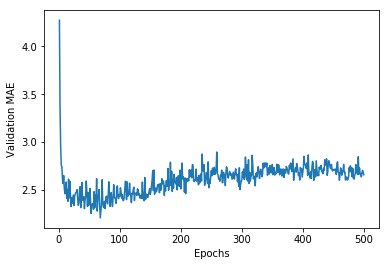

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [29]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=1, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
404/404 [==============================] - 1s 2ms/step - loss: 147.1966 - mean_absolute_error: 8.5567
Epoch 2/80
404/404 [==============================] - 1s 1ms/step - loss: 23.3044 - mean_absolute_error: 3.1803
Epoch 3/80
404/404 [==============================] - 1s 1ms/step - loss: 17.4017 - mean_absolute_error: 2.6797
Epoch 4/80
404/404 [==============================] - 1s 1ms/step - loss: 14.7122 - mean_absolute_error: 2.5359
Epoch 5/80
404/404 [==============================] - 1s 2ms/step - loss: 13.3015 - mean_absolute_error: 2.4991
Epoch 6/80
404/404 [==============================] - 1s 2ms/step - loss: 12.6760 - mean_absolute_error: 2.4011
Epoch 7/80
404/404 [==============================] - 1s 1ms/step - loss: 12.2809 - mean_absolute_error: 2.3255
Epoch 8/80
404/404 [==============================] - 1s 1ms/step - loss: 11.7363 - mean_absolute_error: 2.3019
Epoch 9/80
404/404 [==============================] - 1s 1ms/step - loss: 11.2052 - mean_absolute_error

404/404 [==============================] - 1s 1ms/step - loss: 5.0646 - mean_absolute_error: 1.4947
Epoch 74/80
404/404 [==============================] - 1s 1ms/step - loss: 4.6896 - mean_absolute_error: 1.4313
Epoch 75/80
404/404 [==============================] - 1s 1ms/step - loss: 4.7108 - mean_absolute_error: 1.4488
Epoch 76/80
404/404 [==============================] - 1s 2ms/step - loss: 4.7807 - mean_absolute_error: 1.5091
Epoch 77/80
404/404 [==============================] - 1s 1ms/step - loss: 4.7309 - mean_absolute_error: 1.4272
Epoch 78/80
404/404 [==============================] - 1s 1ms/step - loss: 4.4844 - mean_absolute_error: 1.3967
Epoch 79/80
404/404 [==============================] - 1s 2ms/step - loss: 4.6088 - mean_absolute_error: 1.4522
Epoch 80/80
102/102 [==============================] - 0s 1ms/step


In [30]:
print(test_mse_score, test_mae_score)

15.030380697811351 2.475444990045884
